In [1]:
from pylab import *
from scipy.optimize import *
from scipy.integrate import *

### Ecuaciones diferenciales para el mini sistema solar

In [2]:
def sist_sol(t,x_v,ms=[0,0]):
    # x_v = xt,yt,vxt,vyt,xp,yp,vxp,vyp
    #       0, 1,  2,  3, 4, 5,  6, 7
    dx_v = np.zeros(len(x_v))
    rt , rp = sqrt( x_v[0]**2 + x_v[1]**2 ) , sqrt( x_v[4]**2 + x_v[5]**2 )
    rpt = sqrt( (x_v[0]-x_v[4])**2 + (x_v[1]-x_v[5])**2 )
    # Tierra
    dx_v[0] , dx_v[1] = x_v[2] , x_v[3]
    dx_v[2] = -x_v[0]/(rt**3) - ms[1]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[3] = -x_v[1]/(rt**3) - ms[1]*(x_v[1]-x_v[5])/(rpt**3)
    # Planeta
    dx_v[4] , dx_v[5] = x_v[6] , x_v[7]
    dx_v[6] = -x_v[4]/(rp**3) + ms[0]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[7] = -x_v[5]/(rp**3) + ms[0]*(x_v[1]-x_v[5])/(rpt**3)
    return dx_v

In [3]:
ti_tf = (0,10*pi)
ci = array([1,0,0,1,0.88,0,0,1])
mov_planetario = solve_ivp(sist_sol,ti_tf,ci,args=([0.001,0.001],),
                rtol=1e-8, atol=1e-8,dense_output=True)

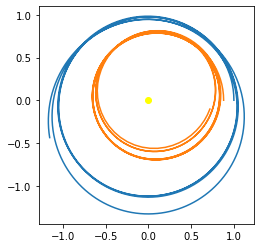

In [4]:
t = linspace(ti_tf[0],ti_tf[1],500)
plot(mov_planetario.sol(t)[0],mov_planetario.sol(t)[1],label="Tierra")
plot(mov_planetario.sol(t)[4],mov_planetario.sol(t)[5],label="Planetoide")

plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

In [5]:
def mapeo(func,t_span,ind,N):
    # N es el numero de raices a obtener
    raices , j = np.zeros(N) , 0
    t = linspace(t_span[0],t_span[1],10*N)
    for i in range(len(t)-1):
        if func.sol(t[i])[ind]*func.sol(t[i+1])[ind] < 0 and j < N:
            raices[j] = t[i]
            j += 1
    for i in range(N):
        raices[i] = newton(lambda t: mov_planetario.sol(t)[ind],raices[i])
    return raices

In [6]:
t_raiz = mapeo(mov_planetario,ti_tf,1,9)

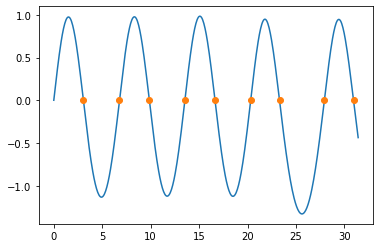

In [7]:
plot(t,mov_planetario.sol(t)[1])
plot(t_raiz,np.zeros(len(t_raiz)),'o')
show()

In [13]:
ti_tf = (0,1000*pi)
ci = array([1,0,0,1,0.88,0,0,1])
mov_planetario = solve_ivp(sist_sol,ti_tf,ci,args=([0.001,0.001],),
                rtol=1e-8, atol=1e-8,dense_output=True)
t_raiz = mapeo(mov_planetario,ti_tf,1,900)

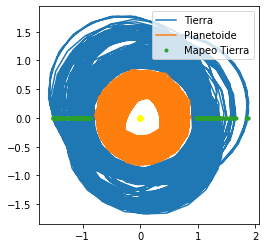

In [14]:
t = linspace(ti_tf[0],ti_tf[1],5000)
plot(mov_planetario.sol(t)[0],mov_planetario.sol(t)[1],label="Tierra")
plot(mov_planetario.sol(t)[4],mov_planetario.sol(t)[5],label="Planetoide")
plot(mov_planetario.sol(t_raiz)[0],mov_planetario.sol(t_raiz)[1],'.',label="Mapeo Tierra")

plot([0],[0],'o',color='yellow')
legend()
gca().set_aspect('equal')
show()

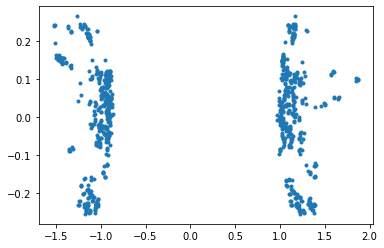

In [15]:
plot(mov_planetario.sol(t_raiz)[0],mov_planetario.sol(t_raiz)[2],'.')
show()

In [32]:
ti_tf = (0,1000*pi)
tray , R = 20 , 1e-2
ci = array([1,0,0,1,0.88,0,0,1])
cis = np.zeros((len(ci),tray))
th = linspace(0,2*pi,tray)
pts = np.zeros((tray,900,2))
for i in range(tray):
    cis[:,i] = ci
    cis[0,i] += R*sin(th[i]) 
    cis[2,i] += R*cos(th[i])
    mov_planetario = solve_ivp(sist_sol,ti_tf,cis[:,i],args=([0.0001,0.0001],),
                               rtol=1e-8, atol=1e-8,dense_output=True)
    t_raiz = mapeo(mov_planetario,ti_tf,1,900)
    pts[i,:,0] = mov_planetario.sol(t_raiz)[0]
    pts[i,:,1] = mov_planetario.sol(t_raiz)[2]
    #plot(mov_planetario.sol(t_raiz)[0],mov_planetario.sol(t_raiz)[2],'.')

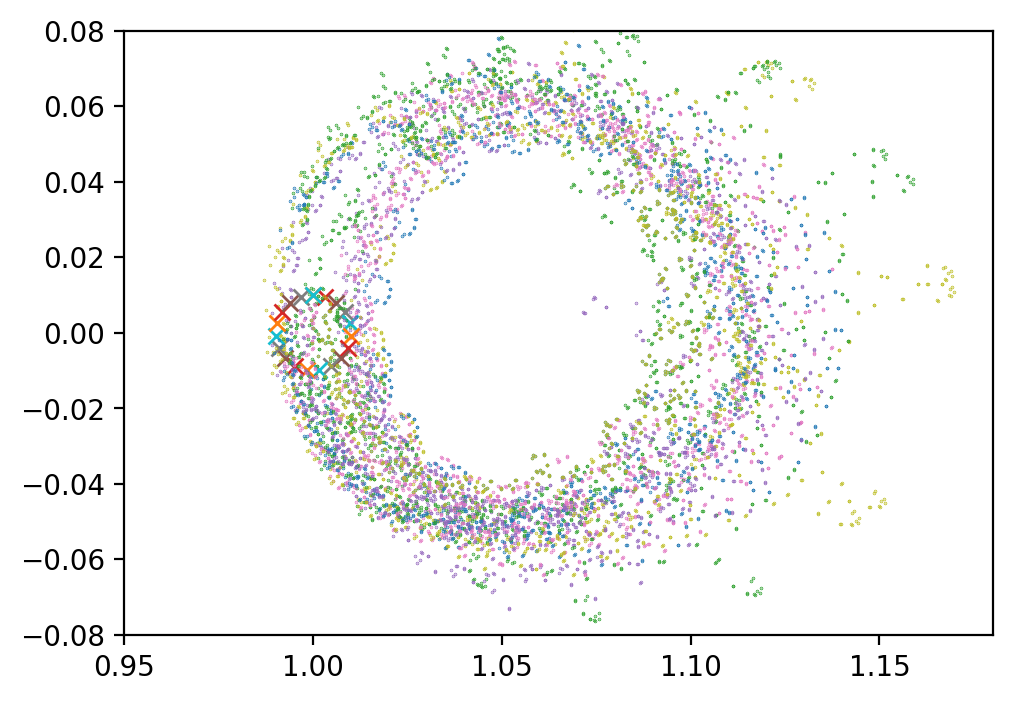

In [39]:
figure(dpi=200)
for i in range(tray):
    plot(pts[i,:,0],pts[i,:,1],'.',markersize=0.5)
    plot(cis[0,i],cis[2,i],'x',)
xlim([0.95,1.18]),ylim([-0.08,0.08])
gca().set_aspect('equal')
show()